In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


In [3]:
#load the database

url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data=pd.read_csv(url, header=None, names=column_names)

print("First few rows of the datasets:")
print(data.head())

First few rows of the datasets:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [4]:
data.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
77.0  1.0  4.0  125.0     304.0  0.0  2.0      162.0    1.0    0.0      1.0    3.0  3.0   4         1
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0         1
34.0  0.0  2.0  118.0     210.0  0.0  0.0      192.0    0.0    0.7      1.0    0.0  3.0   0         1
      1.0  1.0  118.0     182.0  0.0  2.0      174.0    0.0    0.0      1.0    0.0  3.0   0         1
35.0  0.0  4.0  138.0     183.0  0.0  0.0      182.0    0.0    1.4      1.0    0.0  3.0   0         1
                                                                                                   ..
41.0  0.0  2.0  126.0     306.0  0.0  0.0      163.0    0.0    0.0      1.0    0.0  3.0   0         1
                105.0     198.0  0.0  0.0      168.0    0.0    0.0      1.0    1.0  3.0   0         1
40.0  1.0  4.0  152.0     223.0  0.0  0.0      181.0    0.0    0.0      1.0    0.0  7.0

In [5]:
# cleaning the data
data=data.replace('?',np.nan)
data=data.apply(pd.to_numeric)

print("\n missing values in the dataset:")
print(data.isnull().sum())


 missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# fill missing values
data=data.fillna(data.median())

print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
#EDA

print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

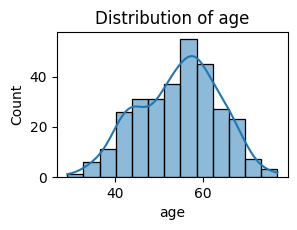

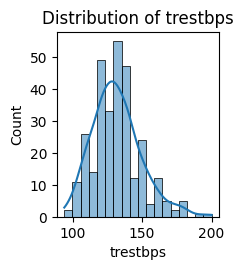

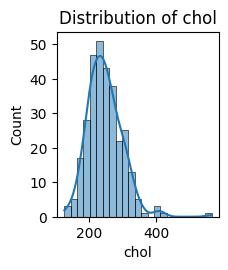

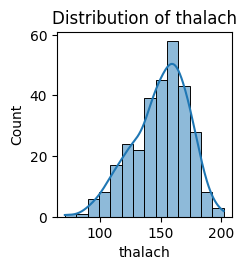

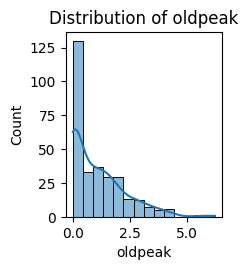

In [8]:
#plotting distributions numeric features
plt.figure(figsize=(8,4))
for i, column in enumerate(['age','trestbps','chol','thalach','oldpeak'], 1):
    plt.subplot(2,3,i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

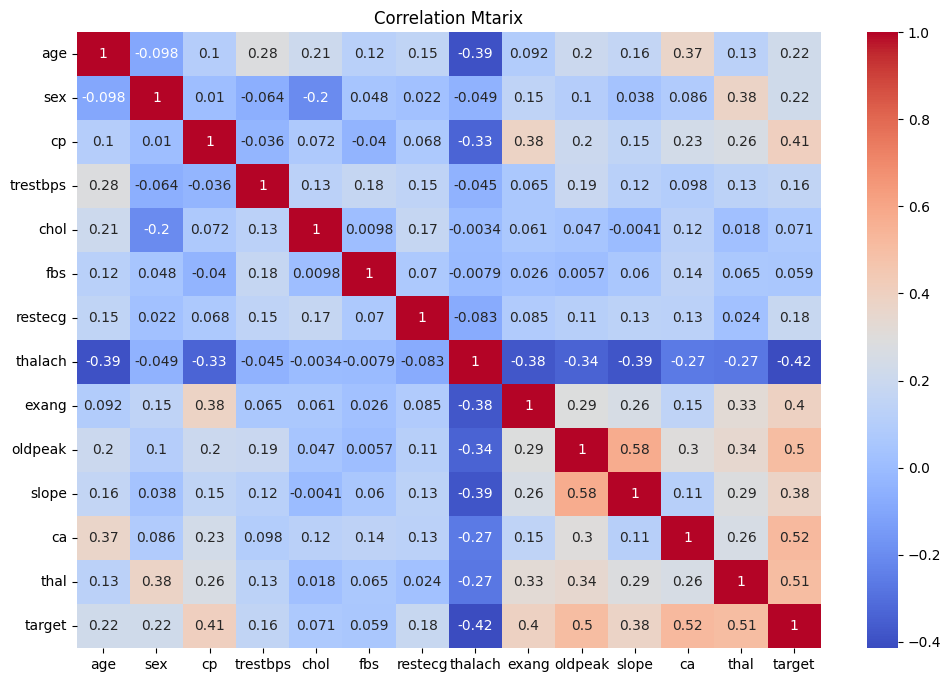

In [9]:
#correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Mtarix')
plt.show()